In [1]:
import os

import pandas as pd
pd.set_option('display.notebook_repr_html', True)
pd.set_option('max_columns', 82)
pd.options.display.max_rows = 100

import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt

import seaborn as sns

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warning from sklearn and seaborn
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])
sns.set_palette(palette = mycols, n_colors = 4)
sns.set(context='notebook', palette='deep')

The Movie Lens [Movie Lens](https://grouplens.org/datasets/movielens/latest/) dataset uses the most up to date data that includes 2018 data.

### Exploring the links, tags, ratings, and movies data

In [3]:
links_df = pd.read_csv('Data/links.csv')
print(links_df.shape, '\n' * 2, 'The Movie Lens links csv has: ', links_df.shape[0], 'rows and ', links_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'links_df Set:', '\n')
display(links_df.head())
print('\n', '=' * 136)

(9742, 3) 

 The Movie Lens links csv has:  9742 rows and  3 columns.


 links_df Set: 



,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


It has a little over 9,700 rows and three columns. The three columns correspond to Movie Lens identifier (MovieId), IMDb movie identifier (imdbId), and TMDb movie identifier (tmdbId).

In [4]:
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [5]:
tags_df = pd.read_csv('Data/tags.csv')
print(tags_df.shape, '\n' * 2, 'The Movie Lens tags csv has: ', tags_df.shape[0], 'rows and ', tags_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'tags_df Set:', '\n')
display(tags_df.head())
print('\n', '=' * 136)

(3683, 4) 

 The Movie Lens tags csv has:  3683 rows and  4 columns.


 tags_df Set: 



,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


This dataset has almost 3700 rows and 4 columns. It has a userId for each individual and a movieId for the "tags" each user gave. The "tag" column represents a word or short phrase given by each user. The timestamp column represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [6]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [7]:
tags_df.userId.nunique()

58

In [8]:
tags_df.movieId.nunique()

1572

In [9]:
movies_df = pd.read_csv('Data/movies.csv')
print(movies_df.shape, '\n' * 2, 'The Movie Lens movies csv has: ', movies_df.shape[0], 'rows and ', movies_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'movies_df Set:', '\n')
display(movies_df.head())
print('\n', '=' * 136)

(9742, 3) 

 The Movie Lens movies csv has:  9742 rows and  3 columns.


 movies_df Set: 



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [11]:
movies_df.title.nunique()

9737

In [12]:
movies_df.movieId.nunique()

9742

In [13]:
movies_df[movies_df.duplicated(['title'], keep=False)].sort_values(by=['title'])

,movieId,title,genres
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
9135,147002,Eros (2004),Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi


In [14]:
ratings_df = pd.read_csv('Data/ratings.csv')
print(ratings_df.shape, '\n' * 2, 'The Movie Lens ratings csv has: ', ratings_df.shape[0], 'rows and ', ratings_df.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'ratings_df Set:', '\n')
display(ratings_df.head())
print('\n', '=' * 136)

(100836, 4) 

 The Movie Lens ratings csv has:  100836 rows and  4 columns.


 ratings_df Set: 



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


This one has over 100,800 rows and 4 columns. The first one corresponds to each individual (userId) who rated a specific movie (movieId) and his/her rating via the rating column. It also has a timestamp column that needs to be converted to be understood.

In [15]:
print(ratings_df.info())
print(ratings_df.userId.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
610


<AxesSubplot:>

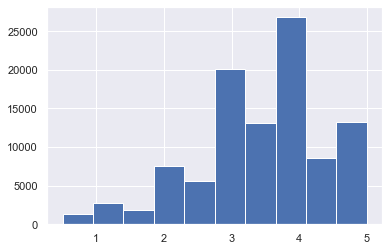

In [16]:
# check ratings distribution due to only 610 individuals
ratings_df.rating.hist()

In [17]:
ratings_df.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [18]:
ratings_df.rating.value_counts(normalize=True)

4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64

In [19]:
ratings_df.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### Movies and Ratings

In [20]:
rat_mov_df = pd.merge(ratings_df, movies_df)
print(rat_mov_df.shape)
rat_mov_df.head()

(100836, 6)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [21]:
rat_mov_df.sort_values(by=['userId', 'movieId'], inplace=True)

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: title, dtype: float64


<AxesSubplot:ylabel='Frequency'>

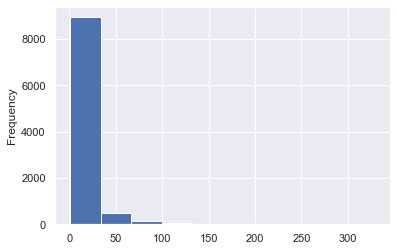

In [23]:
print(rat_mov_df.title.value_counts().describe())

rat_mov_df.title.value_counts().plot(kind='hist')

In [24]:
#movies with ratings less than 100
rat_mov_df_no_out = rat_mov_df[rat_mov_df['title'].map(rat_mov_df['title'].value_counts()) < 100]
rat_mov_df_no_out

,userId,movieId,rating,timestamp,title,genres
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
776,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
831,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
1091,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
1135,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War
...,...,...,...,...,...,...
81464,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
68922,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
81479,610,168250,5.0,1494273047,Get Out (2017),Horror
57554,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


count    9581.000000
mean        8.417493
std        14.397547
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        99.000000
Name: title, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


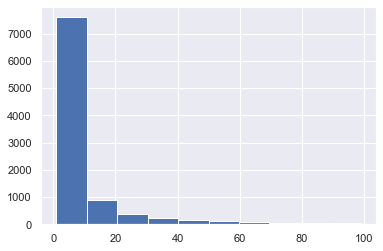

In [25]:
print(rat_mov_df_no_out.title.value_counts().describe())
rat_mov_df_no_out.title.value_counts().hist()
# The vast majority of ratings are under 10.

        userId  movieId  rating   timestamp  \
2946         1      423     3.0   964982363   
5540         1      804     4.0   964980499   
5709         1      940     5.0   964982176   
5717         1      943     4.0   964983614   
5742         1     1009     3.0   964981775   
...        ...      ...     ...         ...   
100834     610   163937     3.5  1493848789   
100835     610   163981     3.5  1493850155   
81464      610   166534     4.0  1493848402   
68922      610   168248     5.0  1493850091   
79014      610   170875     3.0  1493846415   

                                       title                       genres  
2946                       Blown Away (1994)              Action|Thriller  
5540                    She's the One (1996)               Comedy|Romance  
5709    Adventures of Robin Hood, The (1938)     Action|Adventure|Romance  
5717         Ghost and Mrs. Muir, The (1947)        Drama|Fantasy|Romance  
5742         Escape to Witch Mountain (1975)   Adventur

<AxesSubplot:>

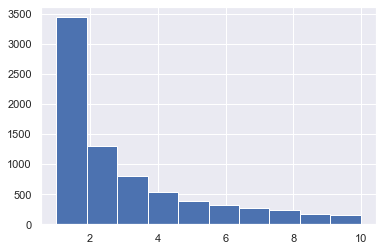

In [27]:
rat_mov_df_no_out10 = rat_mov_df[rat_mov_df['title'].map(rat_mov_df['title'].value_counts()) <= 10]
print(rat_mov_df_no_out10)

print(rat_mov_df_no_out10.title.value_counts().describe())

rat_mov_df_no_out10.title.value_counts().hist()

In [29]:
np.round(1 - 7598/9719, 2)


# 22% of data was loss when filtered to less than 10 ratings.
# Majority of movies had less than 3 ratings. 


0.22

In [30]:
rat_mov_df_top10 = rat_mov_df[rat_mov_df['title'].map(rat_mov_df['title'].value_counts()) > 10]
rat_mov_df_top10

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
57473,610,159093,3.0,1493847704,Now You See Me 2 (2016),Action|Comedy|Thriller
57528,610,164179,5.0,1493845631,Arrival (2016),Sci-Fi
48424,610,166528,4.0,1493879365,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi
81479,610,168250,5.0,1494273047,Get Out (2017),Horror


Forrest Gump (1994)                     329
Shawshank Redemption, The (1994)        317
Pulp Fiction (1994)                     307
Silence of the Lambs, The (1991)        279
Matrix, The (1999)                      278
                                       ... 
Saving Silverman (Evil Woman) (2001)     11
Secrets & Lies (1996)                    11
Break-Up, The (2006)                     11
Beethoven (1992)                         11
Green Hornet, The (2011)                 11
Name: title, Length: 2121, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count    2121.000000
mean       37.548326
std        36.550697
min        11.000000
25%        15.000000
50%        24.000000
75%        45.000000
max       329.000000
Name: title, dtype: float64


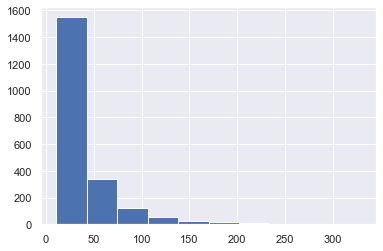

In [31]:
print(rat_mov_df_top10.title.value_counts())

print(rat_mov_df_top10.title.value_counts().hist())

print(rat_mov_df_top10.title.value_counts().describe())

In [32]:
# 100 ratings or more
rat_mov_df_top100 = rat_mov_df[rat_mov_df['title'].map(rat_mov_df['title'].value_counts()) >= 100]
rat_mov_df_top100

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
854,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
...,...,...,...,...,...,...
17063,610,48516,5.0,1479542152,"Departed, The (2006)",Crime|Drama|Thriller
17212,610,58559,4.5,1493844688,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
47305,610,60069,4.5,1493844866,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
42426,610,68954,3.5,1493844881,Up (2009),Adventure|Animation|Children|Drama


Forrest Gump (1994)                                   329
Shawshank Redemption, The (1994)                      317
Pulp Fiction (1994)                                   307
Silence of the Lambs, The (1991)                      279
Matrix, The (1999)                                    278
                                                     ... 
Outbreak (1995)                                       101
Austin Powers: International Man of Mystery (1997)    100
V for Vendetta (2006)                                 100
Casablanca (1942)                                     100
Cast Away (2000)                                      100
Name: title, Length: 138, dtype: int64
count    138.000000
mean     146.289855
std       47.339002
min      100.000000
25%      110.000000
50%      131.000000
75%      170.750000
max      329.000000
Name: title, dtype: float64


<AxesSubplot:>

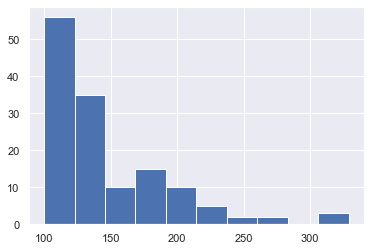

In [33]:
print(rat_mov_df_top100.title.value_counts())
print(rat_mov_df_top100.title.value_counts().describe())
rat_mov_df_top100.title.value_counts().hist()

In [34]:
most_rated = rat_mov_df_top100.groupby('title').size().sort_values(ascending=False)[:50]
most_rated.head(50)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [35]:
# GENRE
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


In [36]:
genre_labels = set()
for s in rat_mov_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [37]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(rat_mov_df, 'genres', genre_labels)
keyword_occurences

[['Drama', 41928],
 ['Comedy', 39053],
 ['Action', 30635],
 ['Thriller', 26452],
 ['Adventure', 24161],
 ['Romance', 18124],
 ['Sci-Fi', 17243],
 ['Crime', 16681],
 ['Fantasy', 11834],
 ['Children', 9208],
 ['Mystery', 7674],
 ['Horror', 7291],
 ['Animation', 6988],
 ['War', 4859],
 ['IMAX', 4145],
 ['Musical', 4138],
 ['Western', 1930],
 ['Documentary', 1219],
 ['Film-Noir', 870],
 ['(no genres listed)', 47]]

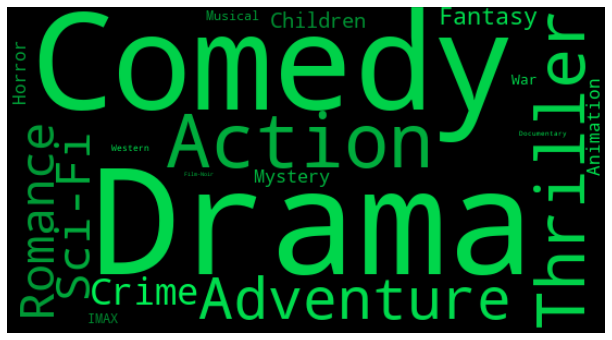

In [40]:
from wordcloud import WordCloud
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

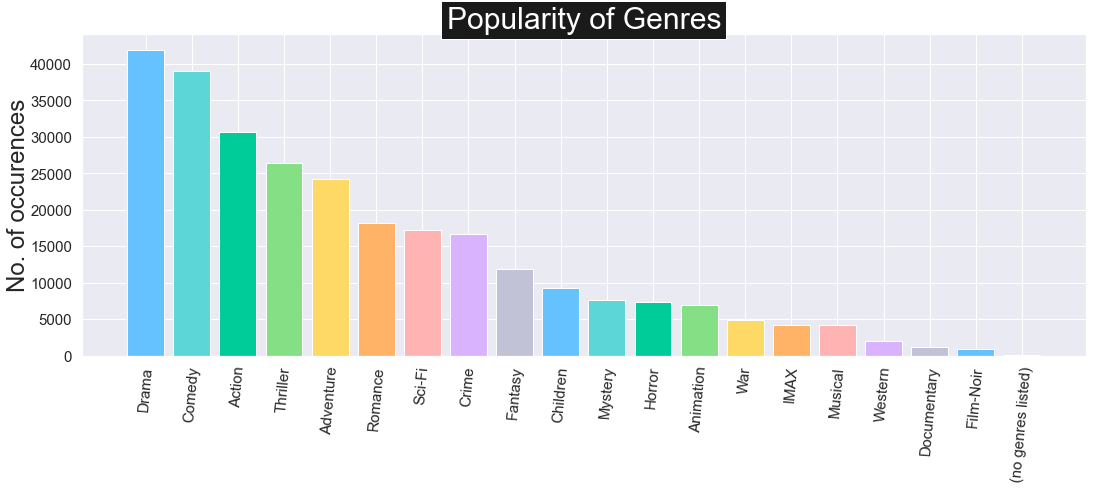

In [41]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color=mycols)
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

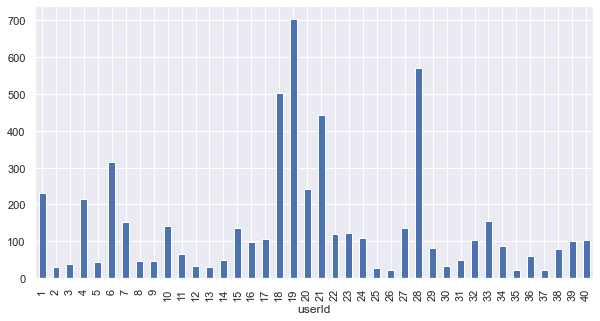

In [43]:
# figure out which users rated the most movies
ratings_by_user = rat_mov_df.drop('timestamp', axis=1)
ratings_by_user = ratings_by_user.groupby('userId').agg([np.size, np.mean])

ratings_by_user.drop('movieId', axis=1)
ratings_by_user['rating']['size'].head(40).sort_values(ascending=False).plot(kind='bar', figsize=(10,5));